In [74]:
import numpy as np, pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

In [75]:
# READ DATA INTO A PANDAS DATAFRAME
data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',
                   header=None)
colnames = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

data.columns = colnames

# ASSIGN A NUMBER TO EACH UNIQUE SPECIES. WILL USE THESE NUMBERS INSTEAD OF NAMES.
data['Species'] = data['species'].map( {'Iris-setosa': 0, 
                                        'Iris-versicolor': 1, 
                                        'Iris-virginica': 2} ).astype(int)

# Logistic Regression Evaluation

In [76]:
logreg = LogisticRegression()

In [77]:
xcol = 'sepal_length'
ycol = 'sepal_width'

X = data.loc[:, [xcol, ycol]]
y = data.Species

In [78]:
logreg.fit(X, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [79]:
# predict the response for the entire dataset

response = logreg.predict(X)

In [80]:
response == np.asarray(y)

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [81]:
comparison = (response == np.asarray(y))

In [82]:
comparison  # an array of True and False. How many True?

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True,  True,  True,  True, False, False, False,  True,
       False,  True, False,  True, False,  True,  True, False, False,
       False,  True, False,  True, False, False,  True,  True, False,
       False, False, False, False, False, False, False,  True,  True,
        True, False, False, False, False, False, False,  True,  True,
        True, False, False,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True,  True,  True, False,  True,
        True,  True,  True,  True,  True, False, False,  True,  True,
        True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True,

In [83]:
comparison = pd.Series(comparison)

In [84]:
comparison.value_counts()

True     115
False     35
dtype: int64

In [85]:
comparison.sum()/len(comparison)  # 76% of the responses match their actual species.

0.7666666666666667

### 76% of the responses match their actual species when Logistic Regression is used.

# K Nearest Neighbors, k=1

In [86]:
from sklearn.neighbors import KNeighborsClassifier

In [87]:
knn = KNeighborsClassifier(n_neighbors=1)

In [88]:
knn.fit(X,y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [89]:
response = knn.predict(X)

In [90]:
comparison = response == np.asarray(y)

In [91]:
comparison.sum()/len(comparison) # 0.9266666666666666

0.9266666666666666

### 93% of the responses match their actual species when K Nearest Neighbors (k=1) is used.

In [92]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
response = knn.predict(X)
comparison = response == np.asarray(y)
comparison.sum()/len(comparison) # 0.8333333333333334

0.8333333333333334

### 83% of the responses match their actual species when K Nearest Neighbors (k=5) is used.

In [ ]:
fractions = []
for n in range(1, 50): #[1,2,3,4,5,6,7,8,9,10,15,20]:
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X,y)
    response = knn.predict(X)
    comparison = response == np.asarray(y)
    frac = comparison.sum()/len(comparison)
    fractions.append(frac)
    print('k = %2i:   %6.3f'%(n, frac))

In [93]:
plt.plot(range(1, 50), fractions, 'r-')
plt.xlabel('number of neighbors')
plt.ylabel('fraction of successful predictions')

k =  1:    0.927
k =  2:    0.873
k =  3:    0.853
k =  4:    0.827
k =  5:    0.833
k =  6:    0.840
k =  7:    0.827
k =  8:    0.813
k =  9:    0.853
k = 10:    0.847
k = 11:    0.833
k = 12:    0.827
k = 13:    0.820
k = 14:    0.827
k = 15:    0.807
k = 16:    0.820
k = 17:    0.807
k = 18:    0.800
k = 19:    0.793
k = 20:    0.793
k = 21:    0.793
k = 22:    0.800
k = 23:    0.807
k = 24:    0.807
k = 25:    0.807
k = 26:    0.813
k = 27:    0.820
k = 28:    0.820
k = 29:    0.813
k = 30:    0.840
k = 31:    0.833
k = 32:    0.827
k = 33:    0.820
k = 34:    0.813
k = 35:    0.820
k = 36:    0.827
k = 37:    0.820
k = 38:    0.827
k = 39:    0.827
k = 40:    0.827
k = 41:    0.813
k = 42:    0.820
k = 43:    0.813
k = 44:    0.827
k = 45:    0.827
k = 46:    0.820
k = 47:    0.820
k = 48:    0.827
k = 49:    0.827


# Numerical Way to Evaluate how well our Model Performed

In [95]:
from sklearn import metrics

In [96]:
logreg = LogisticRegression()
X = data.loc[:, [xcol, ycol]]
y = data.Species
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))

0.7666666666666667


In [97]:
fractions = []
for n in range(1, 10): 
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X,y)
    response = knn.predict(X)
    comparison = response == np.asarray(y)
    frac = comparison.sum()/len(comparison)
    #print(metrics.accuracy_score(y, y_pred))
    print('k = %2i:   %6.3f  %6.3f'%(n, frac, metrics.accuracy_score(y, response)))

k =  1:    0.927   0.927
k =  2:    0.873   0.873
k =  3:    0.853   0.853
k =  4:    0.827   0.827
k =  5:    0.833   0.833
k =  6:    0.840   0.840
k =  7:    0.827   0.827
k =  8:    0.813   0.813
k =  9:    0.853   0.853


scikit-learn's version of the fraction of correct predictions is: 
    
    metrics.accuracy_score(y, y_pred)

### All of the above were for only columns:  'sepal_length' and 'sepal_width'.  What if we use the FULL dataset (all columns) for the training data?

In [98]:
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species,Species
0,5.1,3.5,1.4,0.2,Iris-setosa,0
1,4.9,3.0,1.4,0.2,Iris-setosa,0
2,4.7,3.2,1.3,0.2,Iris-setosa,0
3,4.6,3.1,1.5,0.2,Iris-setosa,0
4,5.0,3.6,1.4,0.2,Iris-setosa,0


In [99]:
X = data.loc[:, :'petal_width']
y = data.Species


logreg = LogisticRegression()
logreg.fit(X, y)
y_pred = logreg.predict(X)
print(metrics.accuracy_score(y, y_pred))


# 1 neighbor
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X,y)
response = knn.predict(X)
print(metrics.accuracy_score(y, response))


# 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X,y)
response = knn.predict(X)
print(metrics.accuracy_score(y, response))

0.96
1.0
0.9666666666666667


## For the full dataset, with all its features, knn with k=1 was the best model to use for this data.  HOWEVER, it SHOULD give you 100% training accuracy because thats how it was built. 


In [100]:
X = data.loc[:, :'petal_width']
y = data.Species

fractions = []
for n in range(1, 50): 
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X,y)
    response = knn.predict(X)
    comparison = response == np.asarray(y)
    frac = comparison.sum()/len(comparison)
    fractions.append(frac)
    print('k = %2i:   %6.3f  %6.3f'%(n, frac, metrics.accuracy_score(y, response)))

k =  1:    1.000   1.000
k =  2:    0.980   0.980
k =  3:    0.960   0.960
k =  4:    0.960   0.960
k =  5:    0.967   0.967
k =  6:    0.973   0.973
k =  7:    0.973   0.973
k =  8:    0.980   0.980
k =  9:    0.980   0.980
k = 10:    0.980   0.980
k = 11:    0.973   0.973
k = 12:    0.980   0.980
k = 13:    0.980   0.980
k = 14:    0.980   0.980
k = 15:    0.987   0.987
k = 16:    0.987   0.987
k = 17:    0.980   0.980
k = 18:    0.973   0.973
k = 19:    0.980   0.980
k = 20:    0.980   0.980
k = 21:    0.980   0.980
k = 22:    0.980   0.980
k = 23:    0.980   0.980
k = 24:    0.973   0.973
k = 25:    0.980   0.980
k = 26:    0.973   0.973
k = 27:    0.973   0.973
k = 28:    0.967   0.967
k = 29:    0.973   0.973
k = 30:    0.953   0.953
k = 31:    0.960   0.960
k = 32:    0.953   0.953
k = 33:    0.960   0.960
k = 34:    0.960   0.960
k = 35:    0.960   0.960
k = 36:    0.953   0.953
k = 37:    0.960   0.960
k = 38:    0.947   0.947
k = 39:    0.953   0.953
k = 40:    0.953   0.953


Text(0, 0.5, 'fraction of successful predictions')

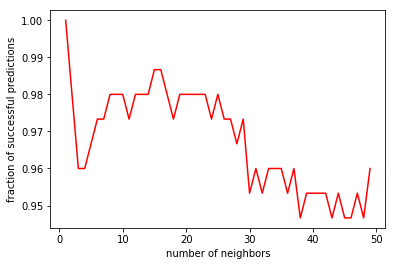

In [101]:
plt.plot(range(1, 50), fractions, 'r-')
plt.xlabel('number of neighbors')
plt.ylabel('fraction of successful predictions')

# Train Test Split

In [103]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [104]:
# STEP 1: split X and y into training and testing sets
from sklearn.model_selection import train_test_split

In [105]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=4)

In [107]:
# print the shapes of the new X objects
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(90, 4)
(60, 4)
(90,)
(60,)


In [108]:
# STEP 2: train the model on the training set
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [110]:
y_pred = logreg.predict(X_test)

In [111]:
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [112]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.95


In [113]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.9666666666666667


In [120]:
preds = []
for n in range(1, 50): 
    knn = KNeighborsClassifier(n_neighbors=n)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    #print(metrics.accuracy_score(y_test, y_pred))
    preds.append(metrics.accuracy_score(y_test, y_pred))
    

Text(0, 0.5, 'fraction of successful predictions')

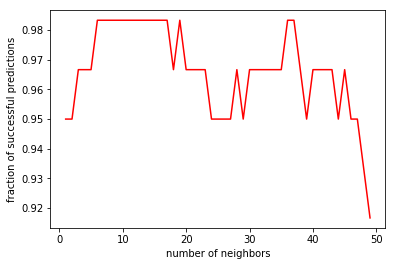

In [122]:
plt.plot(range(1, 50), preds, 'r-')
plt.xlabel('number of neighbors')
plt.ylabel('fraction of successful predictions')

In [123]:
max(preds)

0.9833333333333333

In [171]:
k = np.asarray( list(zip(range(1,50), preds)) )

### The first occurrance where the knn hits its maximum efficiency is when n_neighbors = 6, or k=6. 

In [178]:
k[ k[:,1] == max(preds)]

array([[ 6.        ,  0.98333333],
       [ 7.        ,  0.98333333],
       [ 8.        ,  0.98333333],
       [ 9.        ,  0.98333333],
       [10.        ,  0.98333333],
       [11.        ,  0.98333333],
       [12.        ,  0.98333333],
       [13.        ,  0.98333333],
       [14.        ,  0.98333333],
       [15.        ,  0.98333333],
       [16.        ,  0.98333333],
       [17.        ,  0.98333333],
       [19.        ,  0.98333333],
       [36.        ,  0.98333333],
       [37.        ,  0.98333333]])